## Import Required Libraries


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json


## Load Datasets

In [49]:
# Load the videos excel
df_us = pd.read_csv(r"C:\Users\Ashish Shabolu\OneDrive\Desktop\Elevate Labs\USvideos.csv")
df_in = pd.read_csv(r"C:\Users\Ashish Shabolu\OneDrive\Desktop\Elevate Labs\INvideos.csv")
#  Load category ID mapping
with open(r"C:\Users\Ashish Shabolu\OneDrive\Desktop\Elevate Labs\US_category_id.json", "r") as f:
    category_data = json.load(f)


# Create category ID to name dictionary
id_to_category = {}
for item in category_data['items']:
    id_to_category[int(item['id'])] = item['snippet']['title']

# Add new column for readable category
# df['category'] = df['category_id'].map(id_to_category)
df_us['category'] = df_us['category_id'].map(id_to_category)
df_in['category'] = df_in['category_id'].map(id_to_category)
df_combined = pd.concat([df_us, df_in], ignore_index=True)


df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Load US & IN CSV Data and Add Country Columns

In [51]:
df_us = pd.read_csv(r"C:\Users\Ashish Shabolu\OneDrive\Desktop\Elevate Labs\USvideos.csv")
df_us['country'] = 'US'

df_in = pd.read_csv(r"C:\Users\Ashish Shabolu\OneDrive\Desktop\Elevate Labs\INvideos.csv")
df_in['country'] = 'IN'

df_combined = pd.concat([df_us, df_in], ignore_index=True)



## Clean the Data

In [52]:
# Drop nulls and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Convert date fields
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'])

# Basic info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 40332 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                40332 non-null  object             
 1   trending_date           40332 non-null  datetime64[ns]     
 2   title                   40332 non-null  object             
 3   channel_title           40332 non-null  object             
 4   category_id             40332 non-null  int64              
 5   publish_time            40332 non-null  datetime64[ns, UTC]
 6   tags                    40332 non-null  object             
 7   views                   40332 non-null  int64              
 8   likes                   40332 non-null  int64              
 9   dislikes                40332 non-null  int64              
 10  comment_count           40332 non-null  int64              
 11  thumbnail_link          40332 non-null  object

## Sentiment Analysis

In [53]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Step 1: Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Step 2: Apply Sentiment Analysis to US videos
df_us['sentiment_score'] = df_us['title'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
df_us['sentiment_label'] = df_us['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Step 3: Apply Sentiment Analysis to IN videos
df_in['sentiment_score'] = df_in['title'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
df_in['sentiment_label'] = df_in['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Step 4: Combine US and IN datasets
df_combined = pd.concat([df_us, df_in], ignore_index=True)

# Step 5: Map category_id to readable category names
df_combined['category'] = df_combined['category_id'].map(id_to_category)

# Step 6: Display the first 10 rows with sentiment and category
df_combined[['title', 'category', 'sentiment_score', 'sentiment_label']].head(10)


,title,category,sentiment_score,sentiment_label
0,WE WANT TO TALK ABOUT OUR MARRIAGE,People & Blogs,0.0772,positive
1,The Trump Presidency: Last Week Tonight with J...,Entertainment,0.0000,neutral
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Comedy,-0.6124,negative
3,Nickelback Lyrics: Real or Fake?,Entertainment,-0.4767,negative
4,I Dare You: GOING BALD!?,Entertainment,0.0000,neutral
5,2 Weeks with iPhone X,Science & Technology,0.0000,neutral
6,Roy Moore & Jeff Sessions Cold Open - SNL,Entertainment,0.0000,neutral
7,5 Ice Cream Gadgets put to the Test,Science & Technology,0.0000,neutral
8,The Greatest Showman | Official Trailer 2 [HD]...,Film & Animation,0.6369,positive
9,Why the rise of the robots won’t mean the end ...,News & Politics,0.0000,neutral


## Visualizations

### 1. Top Categories (by ID)

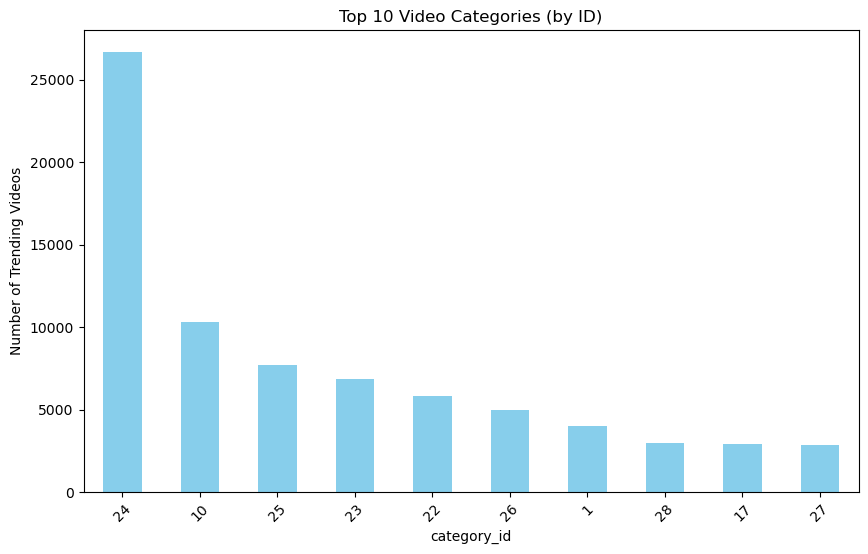

In [54]:
plt.figure(figsize=(10,6))
df_combined['category_id'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Video Categories (by ID)")
plt.xticks(rotation=45)
plt.ylabel("Number of Trending Videos")
plt.show()





### 2. Sentiment Distribution

C:\Users\Ashish Shabolu\AppData\Local\Temp\ipykernel_12456\1766378552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x='sentiment_label', palette='coolwarm')


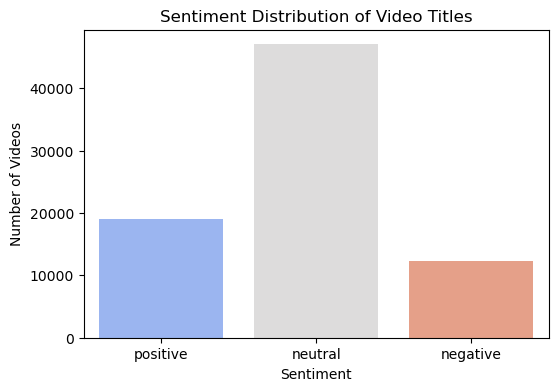

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_combined, x='sentiment_label', palette='coolwarm')
plt.title("Sentiment Distribution of Video Titles")
plt.xlabel("Sentiment")
plt.ylabel("Number of Videos")
plt.show()



### 3. Likes vs Dislikes

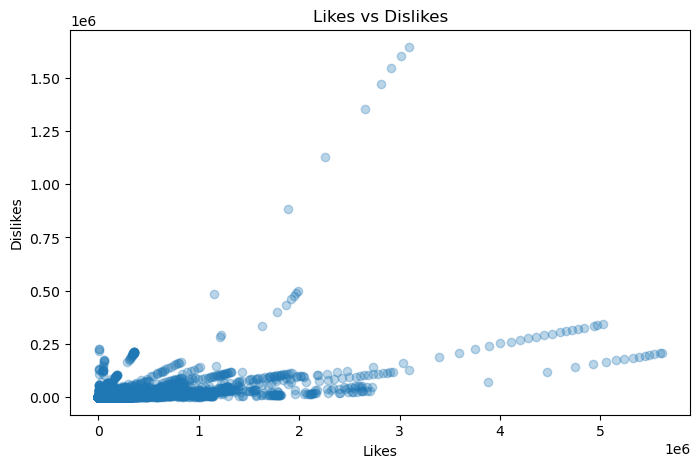

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(df['likes'], df['dislikes'], alpha=0.3)
plt.title("Likes vs Dislikes")
plt.xlabel("Likes")
plt.ylabel("Dislikes")
plt.show()


### 4. Top Categories by Average Views

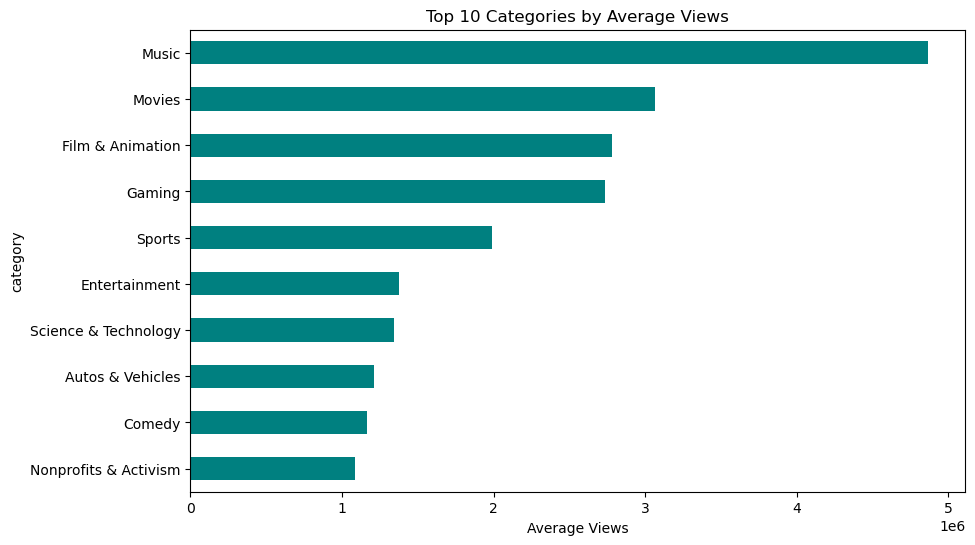

In [41]:
# Group and compute average views
category_avg_views = df_combined.groupby('category')['views'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
category_avg_views.plot(kind='barh', color='teal')
plt.title("Top 10 Categories by Average Views")
plt.xlabel("Average Views")
plt.gca().invert_yaxis()  # To show highest at the top
plt.show()



### 5. Average Views by Category per Country

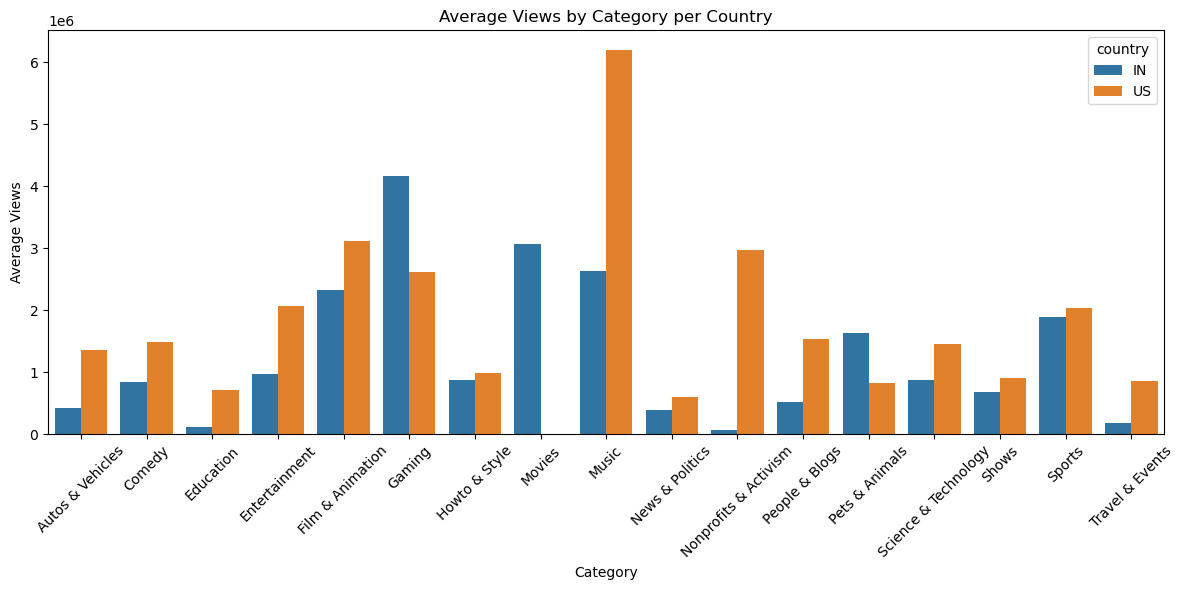

In [42]:
views_by_cat_country = df_combined.groupby(['country', 'category'])['views'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=views_by_cat_country, x='category', y='views', hue='country')
plt.title("Average Views by Category per Country")
plt.xlabel("Category")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 6. Sentiment Comparison: US vs IN

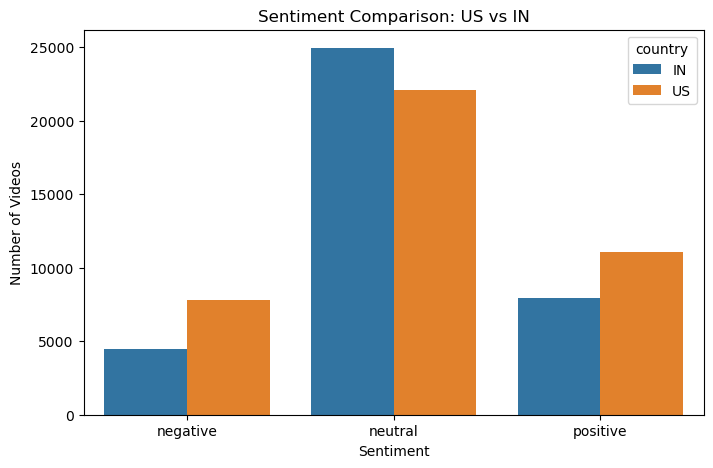

In [43]:
sentiment_comparison = df_combined.groupby(['country', 'sentiment_label']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_comparison, x='sentiment_label', y='count', hue='country')
plt.title("Sentiment Comparison: US vs IN")
plt.xlabel("Sentiment")
plt.ylabel("Number of Videos")
plt.show()
